In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.manifold import TSNE

In [3]:
DATASET_DIR = "../dataset/classification/bank"
SAVE_NAME = "bank.csv"

In [4]:
df = pd.read_csv(f"{DATASET_DIR}/{SAVE_NAME}")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.groupby("y").median()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,38.0,163.5,2.0,999.0,0.0,1.1,93.918,-41.8,4.857,5195.8
yes,37.0,449.0,2.0,999.0,0.0,-1.8,93.200,-40.4,1.266,5099.1


In [5]:
df.groupby("y").mean()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
y,,,,,,,,,,
no,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
yes,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [8]:
pd.crosstab(df["y"],df["contact"])

contact,cellular,telephone
y,,
no,22291,14257
yes,3853,787


In [9]:
pd.crosstab(df["y"],df["poutcome"])

poutcome,failure,nonexistent,success
y,,,
no,3647,32422,479
yes,605,3141,894


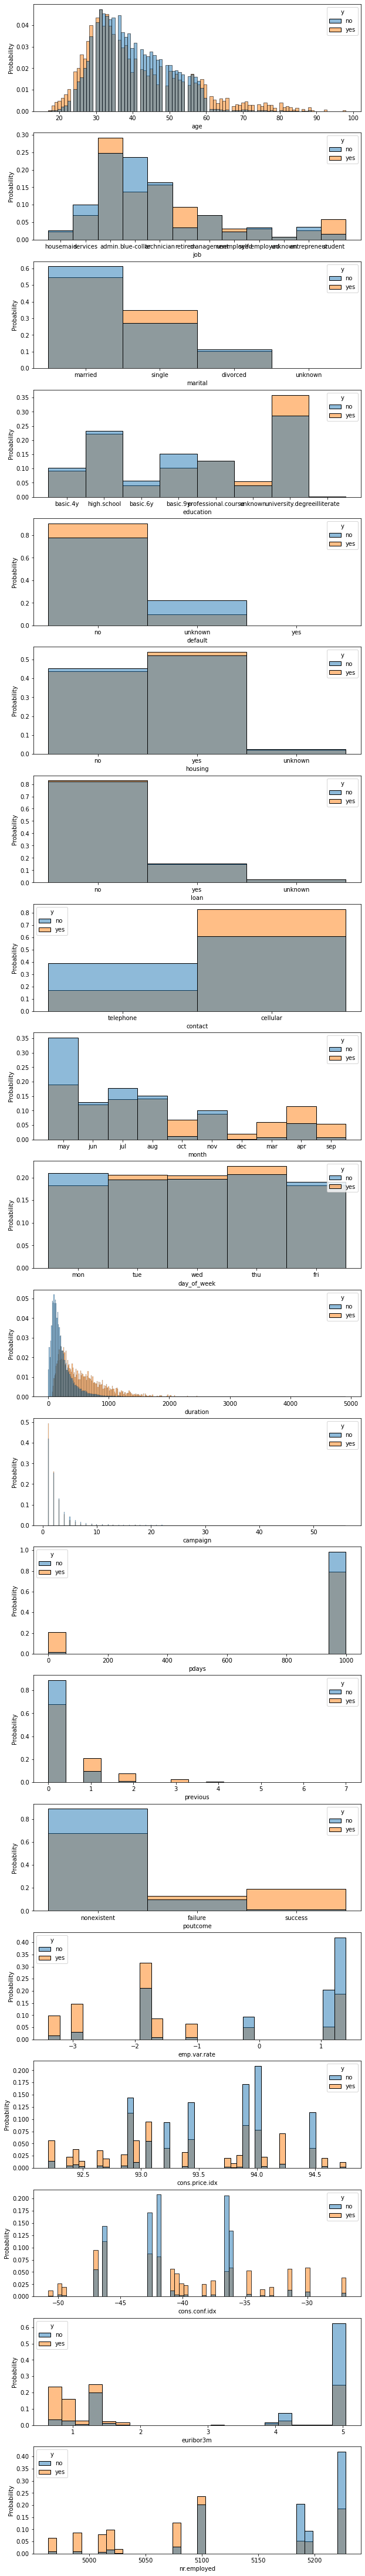

In [7]:
fig, ax = plt.subplots(len(df.columns[:-1]),1, figsize=(10,80))
for i, col in enumerate(df.columns[:-1]):
    g = sns.histplot(x=col, hue="y", stat="probability", common_norm=False, data=df, ax=ax[i], )

# t-sne

In [5]:
features_ori = df.drop(columns=["y","contact"])
is_cat_cols = features_ori.dtypes == object
cat_cols = features_ori.columns[is_cat_cols]
num_cols = features_ori.columns[~is_cat_cols]

onehot = OneHotEncoder(sparse=False)
features_cat = onehot.fit_transform(features_ori[cat_cols])

features_num = features_ori[num_cols].values

print(features_cat.shape, features_num.shape)
features = np.concatenate([features_num, features_cat], axis=1)
features.shape

(41188, 51) (41188, 10)


(41188, 61)

In [6]:
flag = (df["contact"]=="telephone").values
features[flag].shape

(15044, 61)

In [7]:
tsne = TSNE(perplexity=50, random_state=0)
features_embedd = tsne.fit_transform(features)

In [8]:
df_embedd = pd.DataFrame(features_embedd, columns=["embedd_x","embedd_y"])
df_embedd["contact"] = df["contact"]
df_embedd["y"] = df["y"]

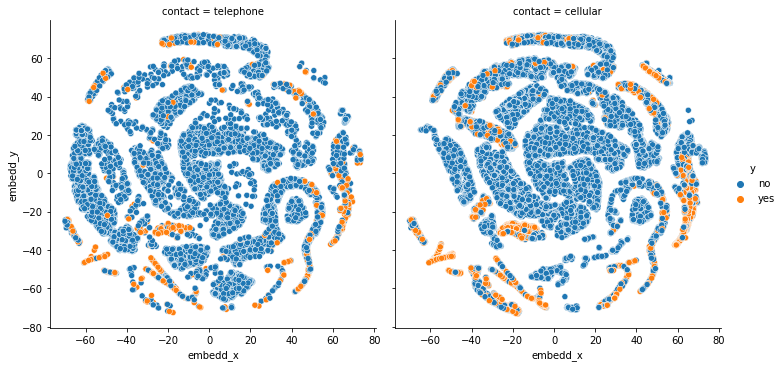

In [9]:
sns.relplot(x="embedd_x", y="embedd_y", col="contact", hue="y", data=df_embedd)